# **TUGAS AKHIR COURSE NLP DENGAN DEEP LEARNING**

Putri Sarah Fransisca - AI HACKER

In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/DATA/Tweets.csv")

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

# Exploratory Data Analysis

In [ ]:
# cek jumlah keseluruhan value untuk setiap label pada kolom airline_sentiment
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

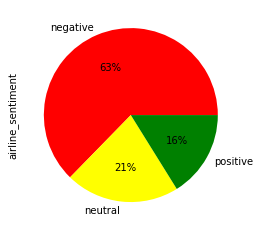

In [ ]:
# visualisasi dalam bentuk pie chart
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [ ]:
# total jumlah tweets terkait untuk setiap airline
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

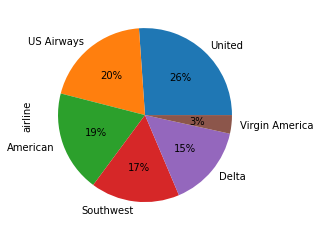

In [ ]:
# visualisasi dalam bentuk pie chart
df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

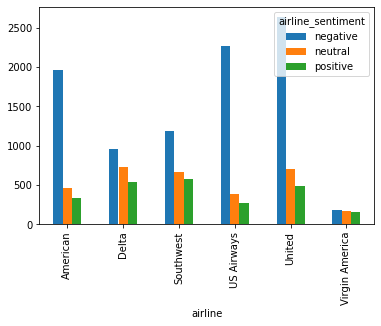

In [ ]:
# visualisasi dalam bentuk bar chart
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

Dari hasil output diatas, terbukti bahwa hampir semua airlines, mayoritas tweets nya adalah negatif lalu netral dan positive. Virgin America satu-satunya yang memiliki ratio yang mirip-mirip untuk ketiga sentimen ini.

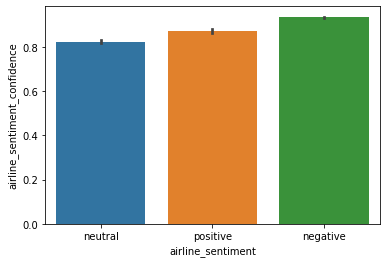

In [ ]:
# menggunakan library seaborn untuk melihat rata-rata dari confidence level untuk tweets yang berkaitan dengan 3 kategori sentimen tsb 
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=df)


Dari output diatas, dapat dilihat bahwa confidence level untuk tweet yang ber-label negatif lebih tinggi daripada yang berlabel netral dan positif.


# Data Cleaning / Text-preprocessing

Data tweet ini memiliki banyak slang word (bahasa sehari-hari yang tidak baku) dan tanda baca yang tidak penting, sehingga perlu di bersihkan dengan cara melakukan text preprocessing meliputi; penghapusan stopwords, case folding, dll

Featured words in negative tweets:


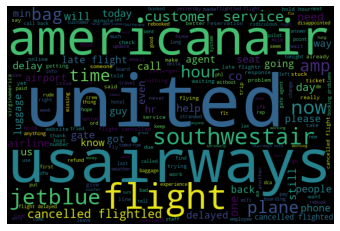

Featured words in neutral tweets:


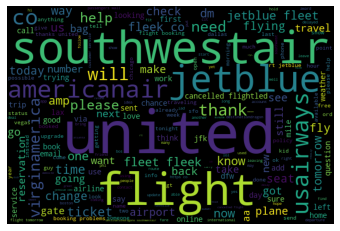

Featured words in positive tweets:


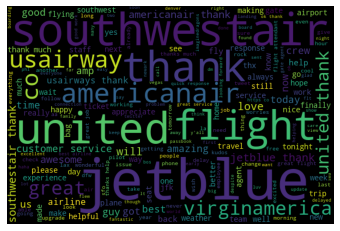

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#fungsi untuk mengvisualisasikan kata-kata yang berkaitan dengan negative/positive/neutral statement
def visualisasi(label):
    words=''
    for msg in df[df['airline_sentiment'] == label]['text']:
        msg = msg.lower()
        words+=msg + ''
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Featured words in negative tweets:")
visualisasi('negative')

print("Featured words in neutral tweets:")
visualisasi('neutral')

print("Featured words in positive tweets:")
visualisasi('positive')

In [ ]:
#import dan download kebutuhan dari library nltk
import nltk
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#praproses data
import re #re = regular expression
import string
from nltk.stem import WordNetLemmatizer #lemmatization
from nltk.tokenize import word_tokenize #tokenisasi
from nltk.corpus import stopwords #stopword

def data_preprocessing(text):
    text = text.lower() #case folding
    text = re.sub(r'https?://\S+|www.\S+', '', text) #filtering simbol
    text = re.sub(r'<.*?>', '', text) #filtering simbol
    text = re.sub(r'[^a-zA-Z]+', ' ', text) #filtering simbol
    text = re.sub(r'[0-9]', '', text) #filtering angka
    translator = str.maketrans("", "", string.punctuation) #menghapus tanda baca
    text = text.translate(translator)
    words = word_tokenize(text) #setiap kata di tokenisasi
    words = [word for word in words if word not in stopwords.words("english")]
    lemmatizer = WordNetLemmatizer() #lemmatization/stemming = mengubah sebuah kata menjadi kata dasarnya
    words = [lemmatizer.lemmatize(word) for word in words]
    text = " ".join(words)
    return text

df["text"] = df.text.map(data_preprocessing)

In [ ]:
maxSeq = len(df["text"][0])
for i in range (0,len(df["text"])):
    try:
        cur = len(df["text"][i])
        if (cur > maxSeq):
            maxSeq = cur
    except:
        pass

In [ ]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)

MAX_NB_WORDS = len(counter)
MAX_SEQUENCE_LENGTH = maxSeq

In [ ]:
import pickle
from keras.preprocessing.text import Tokenizer

EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['text'].values)
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14640, 139)


In [ ]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
df['airline_sentiment'] = labelencoder.fit_transform(df['airline_sentiment'])
Y = df['airline_sentiment'].values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14640,)



# Training and Test


Training set (data latih) = untuk melatih algoritma

Test set (data uji) = untuk menguji atau mengevaluasi performance dari model machine learning yang telah dibuat

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(10980, 139) (10980,)
(3660, 139) (3660,)


In [ ]:
#TRAINING MODEL

import tensorflow
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

model = tensorflow.keras.models.Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
138/138 [==============================] - 16s 97ms/step - loss: 0.3089 - accuracy: 0.5289 - val_loss: -0.1269 - val_accuracy: 0.6530
Epoch 2/10
138/138 [==============================] - 14s 102ms/step - loss: -0.7164 - accuracy: 0.6867 - val_loss: -0.7246 - val_accuracy: 0.6762
Epoch 3/10
138/138 [==============================] - 13s 93ms/step - loss: -1.8119 - accuracy: 0.7238 - val_loss: -1.2489 - val_accuracy: 0.6580
Epoch 4/10
138/138 [==============================] - 13s 92ms/step - loss: -2.8944 - accuracy: 0.7437 - val_loss: -1.7066 - val_accuracy: 0.6503
Epoch 5/10
138/138 [==============================] - 13s 93ms/step - loss: -3.8989 - accuracy: 0.7556 - val_loss: -2.0618 - val_accuracy: 0.6489
Epoch 6/10
138/138 [==============================] - 13s 94ms/step - loss: -4.6077 - accuracy: 0.7566 - val_loss: -2.5643 - val_accuracy: 0.6639
Epoch 7/10
138/138 [==============================] - 13s 93ms/step - loss: -5.6796 - accuracy: 0.7728 - val_loss: -2.9339 -

In [ ]:
from tensorflow.keras.optimizers import SGD

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Akurasi: %.2f%%" % (scores[1]*100))

Akurasi: 64.45%


In [ ]:
#Evaluasi Model
print(history.model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 139, 100)          1091500   
                                                                 
 lstm_4 (LSTM)               (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,108,557
Trainable params: 1,108,557
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

(3660, 1)

In [ ]:
#simpan model
model.save("/content/drive/My Drive/DATA/twitter_us_airline_sentiment.h5")
print("Saved model to disk")

Saved model to disk
